Association rule mining finds interesting associations and relationships among large sets of data items. This rule shows how frequently a itemset occurs in a transaction.

An association rule takes the form:
if AthenB i.e. A-> B ,
where the antecedent A and the consequent B are proper subsets of I, and A and B are mutually exclusive.

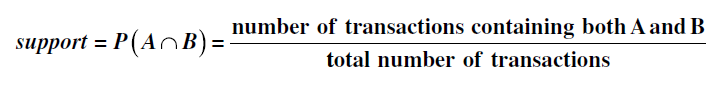

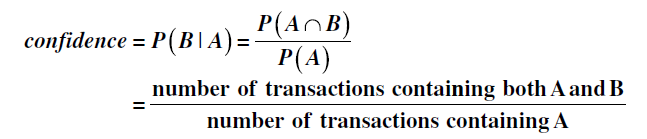

In [16]:


import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample dataset (replace with your actual data)
data = {'Transaction': [1, 2, 3, 4, 5],
        'Milk': [1, 1, 0, 1, 0],
        'Bread': [1, 0, 0, 1, 1],
        'Butter': [0, 1, 1, 1, 0],
        'Cheese': [0, 0, 1, 1, 1]}
df = pd.DataFrame(data).set_index('Transaction')


#Mining Association Rules
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7,num_itemsets=2)
print("Association Rules:\n", rules)

   support  itemsets
0      0.6    (Milk)
1      0.6   (Bread)
2      0.6  (Butter)
3      0.6  (Cheese)
Association Rules:
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [9]:
# Applying the Confidence Difference Criterion
# Calculate confidence difference
rules['confidence_diff'] = rules['confidence'] - rules['conviction']
# Filter rules based on a threshold for confidence difference
confidence_diff_threshold = 0.2
filtered_rules_diff = rules[rules['confidence_diff'] > confidence_diff_threshold]
print("\nAssociation Rules (Confidence Difference Criterion):\n", filtered_rules_diff)



Association Rules (Confidence Difference Criterion):
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski, confidence_diff]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Applying the Confidence Quotient Criterion
# Calculate confidence quotient
rules['confidence_quotient'] = rules['confidence'] / rules['conviction']
# Filter rules based on a threshold for confidence quotient
confidence_quotient_threshold = 0.8
filtered_rules_quotient = rules[rules['confidence_quotient'] > confidence_quotient_threshold]
print("\nAssociation Rules (Confidence Quotient Criterion):\n", filtered_rules_quotient)


Association Rules (Confidence Quotient Criterion):
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski, confidence_diff, confidence_quotient]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
